In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
df = pd.read_csv('advertising.csv')

In [7]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


The sales are in thousands of units and the budget is in thousands of dollars. And each row could be different products or campaigns (not 100% sure)



In [3]:
cor = df.corr()

In [9]:
cor

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


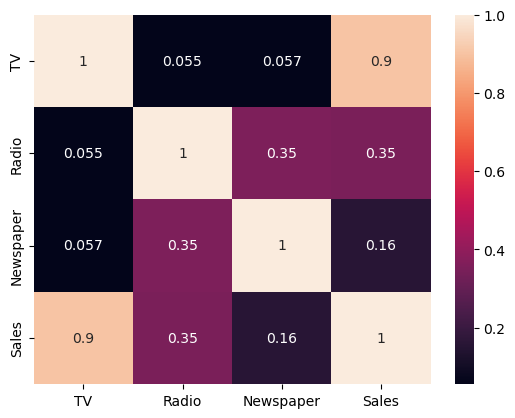

In [12]:
sns.heatmap(df.corr(), annot = True);

In [13]:
len(df)

200

In [23]:
y= df['Sales'].values.reshape(-1,1)

In [5]:
y

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [24]:
X = df['TV'].values.reshape(-1,1)

In [14]:
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=1)

In [26]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [27]:
# the attributes .intercept_ and .coef_ represent the parameters learned by the model during training. 
print(regr.intercept_)

[6.9027181]


In [28]:
print(regr.coef_)

[[0.05565473]]


# The model predicts y (sales) increases by 0.05565473 units for every 1 unit increase in TV (marketing)

In [29]:
# This calculates the predicted value of y when x = 100.
print(regr.intercept_[0] + regr.coef_[0][0] * 100)

12.468191081094576


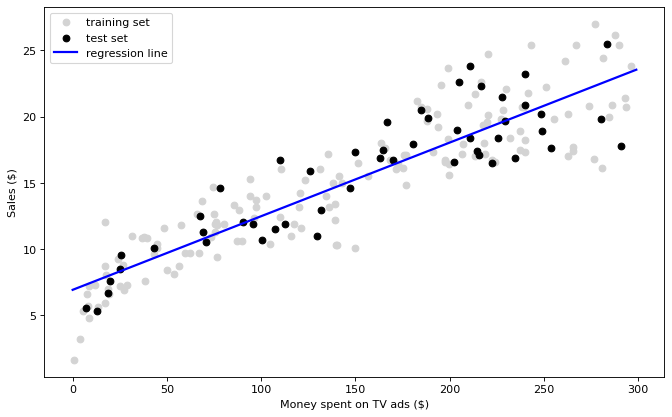

In [30]:
X_plot = np.arange(0,300,1).reshape(-1, 1)
y_plot = regr.predict(X_plot) # This uses trained regression model (regr) to predict sales for each value in X_plot.

plt.figure(figsize=(10,6), dpi= 80)
plt.scatter(X_train, y_train, c='lightgray', label='training set')
plt.scatter(X_test, y_test, c='black', label='test set')
plt.plot(X_plot, y_plot, c='blue', label='regression line', linewidth=2)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.legend()
plt.show()

In [32]:
y_pred = regr.predict(X_test)
print("Residual sum of squares (RSS): %.2f" % sum((y_pred - y_test) ** 2)) # total error
print("Mean absolute error (MAE): %.2f" % np.mean(abs(y_pred - y_test))) # average error
print("Mean square error (MSE): %.2f" % np.mean((y_pred - y_test) ** 2)) # avg squared error
print("Root mean square error (RMSE): %.2f" % np.sqrt(np.mean((y_pred - y_test) ** 2))) #avg squared root error

Residual sum of squares (RSS): 254.58
Mean absolute error (MAE): 1.84
Mean square error (MSE): 5.09
Root mean square error (RMSE): 2.26


C:\Users\Dell\AppData\Local\Temp\ipykernel_3216\224067836.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Residual sum of squares (RSS): %.2f" % sum((y_pred - y_test) ** 2))


## Linear Regression Fuel Consumption

In [35]:
df1 = pd.read_csv('FuelConsumption.csv')

In [36]:
df1

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [45]:
df1['VEHICLECLASS'].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'MINICOMPACT', 'SUBCOMPACT',
       'TWO-SEATER', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

Compute the correlation value between the CO2 emission and the engine size. Do you think that the engine size can be taken as a unique predictor for the CO2 emission?

Plot the CO2 emission with respect to the engine size. Do you think that a linear regression model would fit well here?

Train a linear regression model for the prediction of the CO2 emission based exclusively on the engine size (do not forget the train-test split).

What are the parameters of the regression line? If an engine size is increased by 1 L, what would be the CO2 emission increase as predicted by your model?

Plot the fit line over the data.

Plot the distribution of the residuals (i.e. the error terms).

Compute the model accuracy.

Train a linear regression model for the prediction of the CO2 emission now based exclusively on the combined fuel consumption (FUELCONSUMPTION_COMB) and compute the accuracy. Compare with the accuracy computed at previous point. What can you deduce?

# Engine Size vs CO2

In [47]:
corre = df1['ENGINESIZE'].corr(df1['CO2EMISSIONS'])

In [50]:
corre

0.8741543683958121

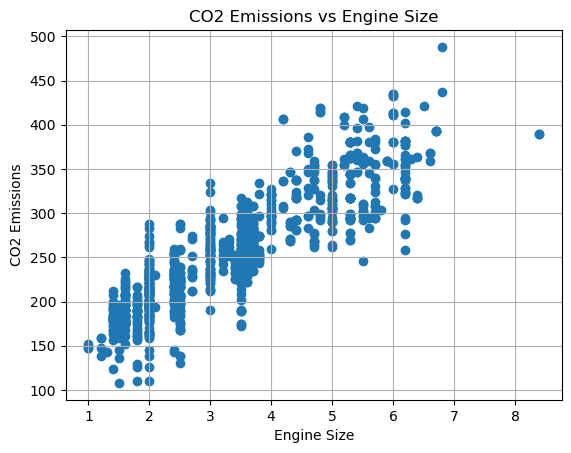

In [77]:
plt.scatter(df1['ENGINESIZE'], df1['CO2EMISSIONS'])
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.title('CO2 Emissions vs Engine Size')
plt.grid(True)
plt.show()

In [62]:
y = df1['CO2EMISSIONS'].values.reshape(-1,1) # first part gives an array, reshape changes the 1D array into 2D column vector

In [61]:
y

array([[196],
       [221],
       [136],
       ...,
       [271],
       [260],
       [294]], dtype=int64)

In [63]:
X = df1['ENGINESIZE'].values.reshape(-1,1)

In [64]:
X

array([[2. ],
       [2.4],
       [1.5],
       ...,
       [3. ],
       [3.2],
       [3.2]])

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [71]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [75]:
print(regr.intercept_)

[126.28970217]


In [76]:
print(regr.coef_) # regression coefficient (slope)

[[38.99297872]]


# C02 emission increases by 38.99 for every 1 unit increase in engine size

In [79]:
print(regr.intercept_[0] + regr.coef_[0][0] * 5)

321.2545957962575


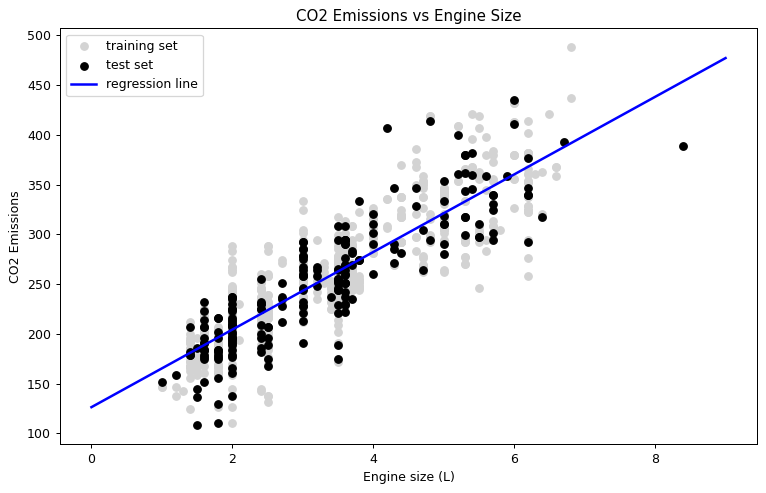

In [100]:
X_plot = np.arange(0,10,1).reshape(-1, 1)
y_plot = regr.predict(X_plot) # This uses trained regression model (regr) to predict CO2 Emission for each value in X_plot.

plt.figure(figsize=(10,6), dpi= 90)
plt.scatter(X_train, y_train, c='lightgray', label='training set')
plt.scatter(X_test, y_test, c='black', label='test set')
plt.plot(X_plot, y_plot, c='blue', label='regression line', linewidth=2)
plt.xlabel("Engine size (L)")
plt.ylabel('CO2 Emissions')
plt.title('CO2 Emissions vs Engine Size')
plt.legend()
plt.show()

In [102]:
y_pred = regr.predict(X_test)
print("Residual sum of squares (RSS): %.2f" % sum((y_pred - y_test) ** 2)) # total error
print("Mean absolute error (MAE): %.2f" % np.mean(abs(y_pred - y_test))) # average error
print("Mean square error (MSE): %.2f" % np.mean((y_pred - y_test) ** 2)) # avg squared error
print("Root mean square error (RMSE): %.2f" % np.sqrt(np.mean((y_pred - y_test) ** 2))) #avg squared root error

Residual sum of squares (RSS): 210990.77
Mean absolute error (MAE): 24.10
Mean square error (MSE): 985.94
Root mean square error (RMSE): 31.40


C:\Users\Dell\AppData\Local\Temp\ipykernel_3216\3163343866.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Residual sum of squares (RSS): %.2f" % sum((y_pred - y_test) ** 2)) # total error


# FUELCONSUMPTION_COMB vs CO2

In [104]:
corre1 = df1['FUELCONSUMPTION_COMB'].corr(df1['CO2EMISSIONS'])

In [105]:
corre1

0.8921285933157568

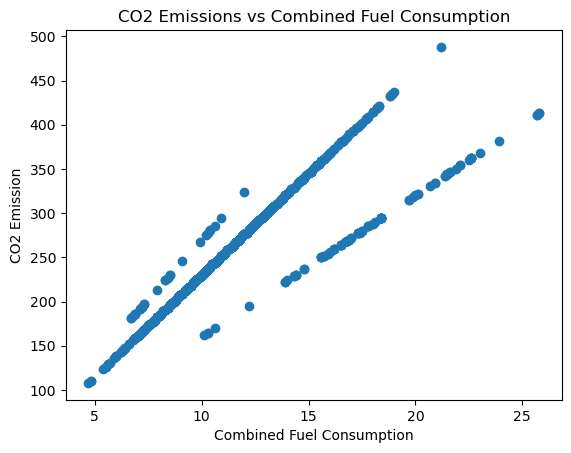

In [109]:
plt.scatter(df1['FUELCONSUMPTION_COMB'], df1['CO2EMISSIONS'])
plt.xlabel('Combined Fuel Consumption')
plt.ylabel('CO2 Emission')
plt.title('CO2 Emissions vs Combined Fuel Consumption')
plt.show()

In [117]:
X = df1['FUELCONSUMPTION_COMB'].values.reshape(-1,1) # first part gives an array, reshape changes the 1D array into 2D column vector

In [118]:
X

array([[ 8.5],
       [ 9.6],
       [ 5.9],
       ...,
       [11.8],
       [11.3],
       [12.8]])

In [119]:
y = df1['CO2EMISSIONS'].values.reshape(-1,1) # first part gives an array, reshape changes the 1D array into 2D column vector

In [120]:
y

array([[196],
       [221],
       [136],
       ...,
       [271],
       [260],
       [294]], dtype=int64)

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 1)

In [122]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [123]:
print(regression.intercept_)

[67.22462507]


In [124]:
print(regression.coef_)

[[16.31628365]]


# C02 emission increases by 16.31 for every 1 unit increase in Combined fuel consumption

In [133]:
print(regression.intercept_[0] + regression.coef_[0][0] * 20)

393.5502980197864


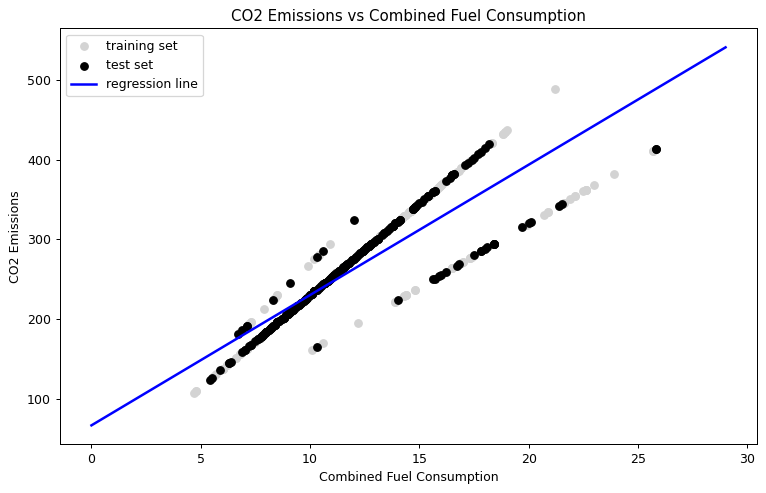

In [132]:
X_plot = np.arange(0,30,1).reshape(-1, 1)
y_plot = regression.predict(X_plot)

plt.figure(figsize=(10,6), dpi= 90)
plt.scatter(X_train, y_train, c='lightgray', label='training set')
plt.scatter(X_test, y_test, c='black', label='test set')
plt.plot(X_plot, y_plot, c='blue', label='regression line', linewidth=2)
plt.xlabel("Combined Fuel Consumption")
plt.ylabel('CO2 Emissions')
plt.title('CO2 Emissions vs Combined Fuel Consumption')
plt.legend()
plt.show()

In [134]:
y_pred = regression.predict(X_test)
print("Residual sum of squares (RSS): %.2f" % sum((y_pred - y_test) ** 2)) # total error
print("Mean absolute error (MAE): %.2f" % np.mean(abs(y_pred - y_test))) # average error
print("Mean square error (MSE): %.2f" % np.mean((y_pred - y_test) ** 2)) # avg squared error
print("Root mean square error (RMSE): %.2f" % np.sqrt(np.mean((y_pred - y_test) ** 2))) #avg squared root error

Residual sum of squares (RSS): 234140.91
Mean absolute error (MAE): 21.14
Mean square error (MSE): 876.93
Root mean square error (RMSE): 29.61


C:\Users\Dell\AppData\Local\Temp\ipykernel_3216\2839819633.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Residual sum of squares (RSS): %.2f" % sum((y_pred - y_test) ** 2)) # total error
